In [1]:
import pandas as pd
df = pd.DataFrame({
    'Name': ['Braund, Mr. Owen Harris', 'Allen, Mr. William Henry', 'Bonnell, Miss. Elizabeth'],
    'Age': [22, 35, 58],
    'Sex': ['male', 'male', 'female']
})
print(df)
print(df['Age'])
print(df.Sex)
print('Age列的类型is:', type(df['Age']))
# df['Age']是一维的只返回行数，df是二维，返回行列数
print('Age列的shape is:', df['Age'].shape, '===df的shape is:', df.shape)
print('取其中几列:', df[['Name', 'Sex']].head())

                       Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female
0    22
1    35
2    58
Name: Age, dtype: int64
0      male
1      male
2    female
Name: Sex, dtype: object
Age列的类型is: <class 'pandas.core.series.Series'>
Age列的shape is: (3,) ===df的shape is: (3, 3)
取其中几列:                        Name     Sex
0   Braund, Mr. Owen Harris    male
1  Allen, Mr. William Henry    male
2  Bonnell, Miss. Elizabeth  female


In [2]:
# DataFrame是二维数据结构，每一列都是一个Series
# Series是一维数据，只是单列的，有行标签
ages = pd.Series([13, 39, 38], name = 'OurAge')
ages

0    13
1    39
2    38
Name: OurAge, dtype: int64

In [3]:
# max获取DataFrame某项最大值
print('df 中最大Age is:', df.Age.max())
ages.max()

df 中最大Age is: 58


39

In [4]:
# 获取数据的基本统计信息
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


In [5]:
# ages = [13, 39, 38]
# count ages中非空值的数量，3
# mean ages中数值平均数
# std ages中标准差，衡量数据离散程度，越大表示波动越大（默认按样本标准差计算）
# 25% ages中第25分位数（第一四分位数），有25%的数据小于等于这个值
# 50% 第50分位数，也就是中位数
ages.describe()

count     3.00000
mean     30.00000
std      14.73092
min      13.00000
25%      25.50000
50%      38.00000
75%      38.50000
max      39.00000
Name: OurAge, dtype: float64

In [6]:
# read_csv(),将以csv文件形式存储的数据读取到pandas的DataFrame中
passInfo = pd.read_csv('data/test.csv')
# data.head()显示前五行数据，参数设置为几表示显示前几行，例如head(1)表示显示第一、二行数据
# passInfo.head(2)
print(passInfo.head())
# data.tail(num)显示最后num行
print(passInfo.tail(2))
# pandas的dtypes属性，可以检查pandas如何解释每个列的数据类型
print(passInfo.dtypes)

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch
0            1         0       3    male   22      1      0
1            2         1       1  female   38      1      0
2            3         1       3  female   26      0      0
3            4         1       1  female   35      1      0
4            5         0       2    male   35      0      0
   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch
7            8         0       3    male    2      3      1
8            9         1       3  female   27      0      2
PassengerId     int64
Survived        int64
Pclass          int64
Sex            object
Age             int64
SibSp           int64
Parch           int64
dtype: object


In [7]:
# pip install openpyxl

In [8]:
# 将csv存储为电子表格excel文件
# 需要单独安装包 openpyxl
# index = False 行索引标签不会保存到电子表格中
passInfo.to_excel('data/test.xlsx', sheet_name = 'test_table', index = False)

In [9]:
# padans读取excel
passExcelInfo = pd.read_excel('data/test.xlsx')
print(passExcelInfo.head())

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch
0            1         0       3    male   22      1      0
1            2         1       1  female   38      1      0
2            3         1       3  female   26      0      0
3            4         1       1  female   35      1      0
4            5         0       2    male   35      0      0


In [10]:
# 获取passInfo的摘要
# RangeIndex: 9 entries, 0 to 8共用9个条目，即9行，每行都有一个行标签（也称为 index），其值范围从 0 到 8。
# Data columns (total 7 columns): 该表有 7 列。大多数列的每行都有一个值（所有 9 个值都是 non-null）。有些列确实有缺失值，且 non-null 值少于 9 个。
# dtypes: int64(6), object(1)数据信息中包含6个整数型，1个object
print(passInfo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  9 non-null      int64 
 1   Survived     9 non-null      int64 
 2   Pclass       9 non-null      int64 
 3   Sex          9 non-null      object
 4   Age          9 non-null      int64 
 5   SibSp        9 non-null      int64 
 6   Parch        9 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 636.0+ bytes
None


In [11]:
# 按条件筛选
# 条件表达式（>，但 ==, !=, <, <= 等也同样适用）的输出实际上是一个布尔值（True 或 False）的 pandas Series，其行数与原始 DataFrame 相同。这种布尔值的 Series 可以通过将其放入选择括号 [] 中来筛选 DataFrame。只有值为 True 的行才会被选中。
above_35 = passInfo[passInfo['Age'] > 35]
print(above_35.head())
print(above_35.shape)

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch
1            2         1       1  female   38      1      0
6            7         0       1    male   54      0      0
(2, 7)


In [12]:
# 获取passInfo中舱位等级为 2 和 3 的乘客
# isin() 条件函数对于提供列表中包含值的每一行返回 True
class_23 = passInfo[passInfo['Pclass'].isin([2, 3])]
print(class_23.head())
print(class_23.shape)

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch
0            1         0       3    male   22      1      0
2            3         1       3  female   26      0      0
4            5         0       2    male   35      0      0
5            6         0       3    male   18      0      0
7            8         0       3    male    2      3      1
(6, 7)


In [13]:
# notna() 条件函数对于值不是 Null 值的每一行返回 True。因此，它可以与选择括号 [] 结合使用来筛选数据表。
age_no_na = passInfo[passInfo['Age'].notna()]
print(age_no_na.head())
print(age_no_na.shape)

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch
0            1         0       3    male   22      1      0
1            2         1       1  female   38      1      0
2            3         1       3  female   26      0      0
3            4         1       1  female   35      1      0
4            5         0       2    male   35      0      0
(9, 7)


In [14]:
# 选择特定行和列,pd.loc[]
# 需要一次性创建行和列的子集。需要在选择括号 [] 前面使用 loc/iloc 运算符。当使用 loc/iloc 时，逗号前是您想要的行，逗号后是您想要选择的列。
above_35_Sex = passInfo.loc[passInfo['Age'] > 35, 'Sex']
print(above_35_Sex.head())
print(above_35_Sex.shape)

1    female
6      male
Name: Sex, dtype: object
(2,)


In [15]:
# 选择第 2 到 4 行, 以及第1到第5列
row_3to5 = passInfo.iloc[2:4, 1:5]
print(row_3to5)

   Survived  Pclass     Sex  Age
2         1       3  female   26
3         1       1  female   35


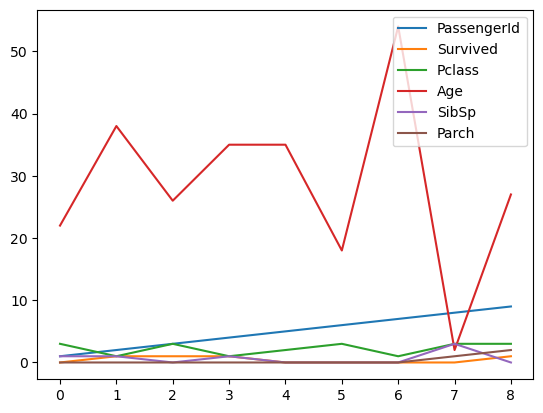

In [16]:
import matplotlib.pyplot as plt
passInfo.plot()
plt.show()

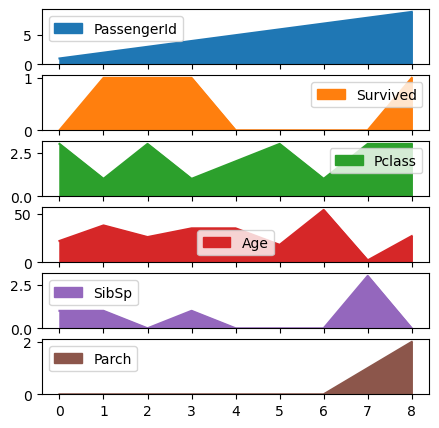

In [17]:
subplt = passInfo.plot.area(figsize=(5, 5), subplots=True)
plt.show()

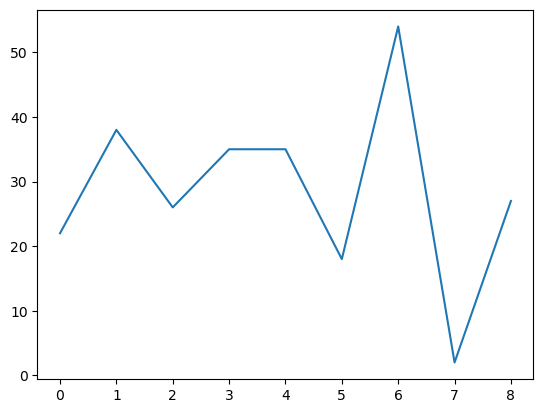

In [18]:
# 仅绘制Age
passInfo['Age'].plot()
plt.show()

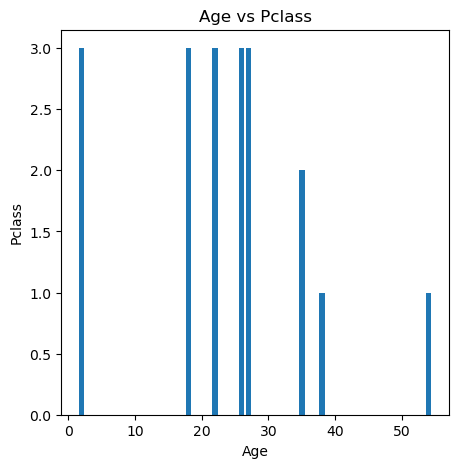

In [19]:
x = passInfo['Age']
y = passInfo['Pclass']
fig = plt.figure(figsize = (5, 5))
plt.bar(x, y)
plt.title('Age vs Pclass')
plt.xlabel('Age')
plt.ylabel('Pclass')
# 保存图表
fig.savefig('data/test.png')
plt.show()

In [20]:
# 新增一列，心理年龄 = 年龄 * 1.2
# 值的计算(数学运算符+-*/或逻辑运算<>==等)是**逐元素**进行的。这意味着给定列中的所有值会一次性乘以除以... 1.2。你无需使用循环来迭代每一行！
passInfo['PsychologicalAge'] = passInfo['Age'] * 1.2
passInfo.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,PsychologicalAge
0,1,0,3,male,22,1,0,26.4
1,2,1,1,female,38,1,0,45.6
2,3,1,3,female,26,0,0,31.2
3,4,1,1,female,35,1,0,42.0
4,5,0,2,male,35,0,0,42.0


In [21]:
# 仓位和年龄的比例
passInfo['PclassRatioAge'] = (passInfo['Pclass'] / passInfo['Age'])
print(passInfo.head())

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch  PsychologicalAge  \
0            1         0       3    male   22      1      0              26.4   
1            2         1       1  female   38      1      0              45.6   
2            3         1       3  female   26      0      0              31.2   
3            4         1       1  female   35      1      0              42.0   
4            5         0       2    male   35      0      0              42.0   

   PclassRatioAge  
0        0.136364  
1        0.026316  
2        0.115385  
3        0.028571  
4        0.057143  


In [22]:
# 重命名列名, 不改变原始数据
pclass_renamed = passInfo.rename(columns = {'Pclass': 'Class'})
print(pclass_renamed.head())

   PassengerId  Survived  Class     Sex  Age  SibSp  Parch  PsychologicalAge  \
0            1         0      3    male   22      1      0              26.4   
1            2         1      1  female   38      1      0              45.6   
2            3         1      3  female   26      0      0              31.2   
3            4         1      1  female   35      1      0              42.0   
4            5         0      2    male   35      0      0              42.0   

   PclassRatioAge  
0        0.136364  
1        0.026316  
2        0.115385  
3        0.028571  
4        0.057143  


In [23]:
print(passInfo.head())

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch  PsychologicalAge  \
0            1         0       3    male   22      1      0              26.4   
1            2         1       1  female   38      1      0              45.6   
2            3         1       3  female   26      0      0              31.2   
3            4         1       1  female   35      1      0              42.0   
4            5         0       2    male   35      0      0              42.0   

   PclassRatioAge  
0        0.136364  
1        0.026316  
2        0.115385  
3        0.028571  
4        0.057143  


In [24]:
# 将列名改写为全小写
# passInfo_renamed = passInfo.rename(columns = str.upper)
passInfo_renamed = passInfo.rename(columns = str.lower)
print(passInfo_renamed.head())

   passengerid  survived  pclass     sex  age  sibsp  parch  psychologicalage  \
0            1         0       3    male   22      1      0              26.4   
1            2         1       1  female   38      1      0              45.6   
2            3         1       3  female   26      0      0              31.2   
3            4         1       1  female   35      1      0              42.0   
4            5         0       2    male   35      0      0              42.0   

   pclassratioage  
0        0.136364  
1        0.026316  
2        0.115385  
3        0.028571  
4        0.057143  


In [25]:
print(passInfo.head())

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch  PsychologicalAge  \
0            1         0       3    male   22      1      0              26.4   
1            2         1       1  female   38      1      0              45.6   
2            3         1       3  female   26      0      0              31.2   
3            4         1       1  female   35      1      0              42.0   
4            5         0       2    male   35      0      0              42.0   

   PclassRatioAge  
0        0.136364  
1        0.026316  
2        0.115385  
3        0.028571  
4        0.057143  


In [26]:
# 获取平均年龄
print('平均年龄是：', passInfo['Age'].mean())
# 获取年龄的中位数
print('年龄中位数是：', passInfo.Age.median())
# 获取年龄和心理年龄的中位数
print('年龄和心理年龄中位数是：', passInfo[['Age', 'PsychologicalAge']].median())

平均年龄是： 28.555555555555557
年龄中位数是： 27.0
年龄和心理年龄中位数是： Age                 27.0
PsychologicalAge    32.4
dtype: float64


In [27]:
# 按类别分组的聚合统计量,groupby 提供了拆分-应用-组合模式的强大功能。
# 男性和女性乘客的平均年龄分别是多少
# groupby('Sex')按性别创建类别组
print(passInfo[['Sex', 'Age']].groupby('Sex').mean())
print(passInfo.groupby("Sex")["Age"].mean())

         Age
Sex         
female  31.5
male    26.2
Sex
female    31.5
male      26.2
Name: Age, dtype: float64


In [28]:
# 按类别统计记录数,value_counts() 方法统计列中每个类别的记录数
# 获取每个客舱等级中有多少乘客？
print(passInfo['Pclass'].value_counts())

Pclass
3    5
1    3
2    1
Name: count, dtype: int64


In [29]:
# 排序表格行
# print(passInfo.sort_values(by = ['Age'], ascending = False).head())
# 根据客舱等级和年龄以降序排列数据
print(passInfo.sort_values(by = ['Pclass', 'Age'], ascending = False).head())

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch  PsychologicalAge  \
8            9         1       3  female   27      0      2              32.4   
2            3         1       3  female   26      0      0              31.2   
0            1         0       3    male   22      1      0              26.4   
5            6         0       3    male   18      0      0              21.6   
7            8         0       3    male    2      3      1               2.4   

   PclassRatioAge  
8        0.111111  
2        0.115385  
0        0.136364  
5        0.166667  
7        1.500000  


In [30]:
# 过滤出仓位为1的乘客信息
passInfo_Pclass1 = passInfo[passInfo.Pclass == 1]
print(passInfo_Pclass1)

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch  PsychologicalAge  \
1            2         1       1  female   38      1      0              45.6   
3            4         1       1  female   35      1      0              42.0   
6            7         0       1    male   54      0      0              64.8   

   PclassRatioAge  
1        0.026316  
3        0.028571  
6        0.018519  


In [31]:
# combine data from multiple tables, axis = 0 按行合并， axis = 1按列合并
# 合并两个表格为一个
salaryInfo = pd.read_csv('data/salary.csv')
levelInfo = pd.read_csv('data/level.csv')
concatInfo = pd.concat([salaryInfo, levelInfo], axis = 1)
print(concatInfo)

   name  month  salary  name  years  level
0   111      1    1000   111      1     10
1   222      2    1100   222      2     20
2   333      3    1210   333      3     30
3   444      4    1331   444      4     40
4   555      5    1464   555      5     50
5   666      6    1611   666      6     60
6   777      7    1772   777      7     70
7   888      8    1949   888      8     80
8   999      9    2144   999      9     90
9  1111     10    5144  1111     10    100


In [32]:
# 以name字段为key合并两个表格
mergeInfo = pd.merge(salaryInfo, levelInfo, how = 'left', on = 'name')
print(mergeInfo)

   name  month  salary  years  level
0   111      1    1000      1     10
1   222      2    1100      2     20
2   333      3    1210      3     30
3   444      4    1331      4     40
4   555      5    1464      5     50
5   666      6    1611      6     60
6   777      7    1772      7     70
7   888      8    1949      8     80
8   999      9    2144      9     90
9  1111     10    5144     10    100


In [33]:
air_quality = pd.read_csv('data/air_quality_no2_long.csv')
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [34]:
# rename不改变原数据，如果希望修改原数据，将修改后的数据赋值给自己
air_quality = air_quality.rename(columns = {'date.utc': 'datetime'})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [35]:
# 获取city的类别
print(air_quality.city.unique())
# 报错'str' object has no attribute 'year'
# print('before convert:', air_quality.datetime[0].year)

['Paris' 'Antwerpen' 'London']


In [36]:
# 起初表中的datetime是字符串形式，无法读取确切的年、月、星期等具体时间
# 通过pd.to_datetime转化之后为pandas.Timestamp可以
air_quality['datetime'] = pd.to_datetime(air_quality['datetime'])
print(air_quality.datetime.head())
print(air_quality.datetime[0].year)

0   2019-06-21 00:00:00+00:00
1   2019-06-20 23:00:00+00:00
2   2019-06-20 22:00:00+00:00
3   2019-06-20 21:00:00+00:00
4   2019-06-20 20:00:00+00:00
Name: datetime, dtype: datetime64[ns, UTC]
2019


In [37]:
# 读取带时间表格，可以在读取时候进行转化为pandas.Timestamp格式，可以作为对象读取，操作
# air_quality_date = pd.read_csv('data/air_quality_no2_long.csv')
# print(air_quality_date['date.utc'][0].year)
air_quality_date = pd.read_csv('data/air_quality_no2_long.csv', parse_dates = ['date.utc'])
print(air_quality_date['date.utc'][0].year)

2019


In [38]:
# Using pandas.Timestamp for datetimes enables us to calculate with date information and make them comparable. Hence, we can use this to get the length of our time series:
print(air_quality_date['date.utc'].min(), air_quality_date['date.utc'].max())
print('时间差是：', air_quality_date['date.utc'].max() - air_quality_date['date.utc'].min())

2019-05-07 01:00:00+00:00 2019-06-21 00:00:00+00:00
时间差是： 44 days 23:00:00


In [39]:
# 增加一列，数据来源是date.utc列中的月份值
# By using Timestamp objects for dates, a lot of time-related properties are provided by pandas. For example the month, but also year, quarter,… All of these properties are accessible by the dt accessor.
air_quality_date['month'] = air_quality_date['date.utc'].dt.month
print(air_quality_date.head())

    city country                  date.utc location parameter  value   unit  \
0  Paris      FR 2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³   
1  Paris      FR 2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³   
2  Paris      FR 2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³   
3  Paris      FR 2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³   
4  Paris      FR 2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³   

   month  
0      6  
1      6  
2      6  
3      6  
4      6  


In [40]:
# What is the average NO2 concentration for each day of the week for each of the measurement locations
air_quality_date.groupby([air_quality_date['date.utc'].dt.weekday, 'location'])['value'].mean()

date.utc  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Text(0, 0.5, '$NO_2(ug/m^3)$')

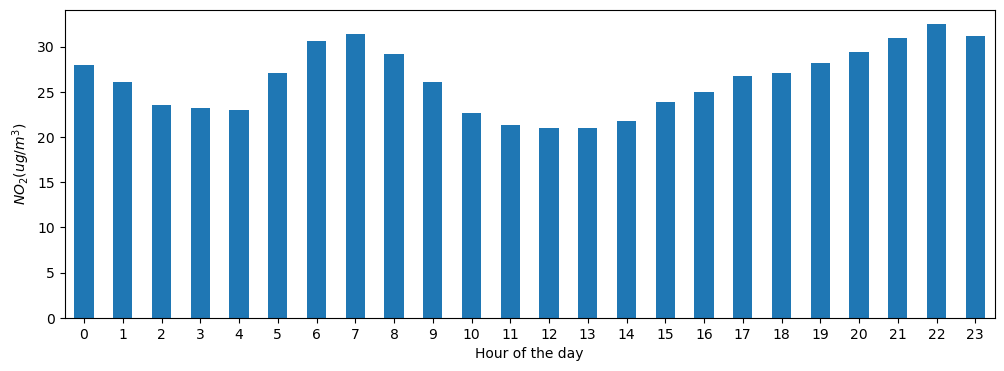

In [41]:
fig_air, axs = plt.subplots(figsize = (12, 4))
air_quality_date.groupby(air_quality_date['date.utc'].dt.hour)['value'].mean().plot(kind = 'bar', rot = 0, ax = axs)
plt.xlabel('Hour of the day')
plt.ylabel('$NO_2(ug/m^3)$')

In [42]:
# pivot = “指定谁做行、谁做列、谁做格子里的值，然后把表铺开”
no_2 = air_quality_date.pivot(index = 'date.utc', columns = 'location', values = 'value')
print(no_2.head())

location                   BETR801  FR04014  London Westminster
date.utc                                                       
2019-05-07 01:00:00+00:00     50.5     25.0                23.0
2019-05-07 02:00:00+00:00     45.0     27.7                19.0
2019-05-07 03:00:00+00:00      NaN     50.4                19.0
2019-05-07 04:00:00+00:00      NaN     61.9                16.0
2019-05-07 05:00:00+00:00      NaN     72.4                 NaN


In [43]:
# pip install chardet

In [44]:
# pivot = “指定谁做行、谁做列、谁做格子里的值，然后把表铺开”
# 每一行是一个日期，每一列是一个城市，格子里是销量”
# 通过先检测编码，再用检测到的编码读入，可以最大程度避免中文乱码问题。GB2312
import chardet
with open('data/city.csv', 'rb') as f:
    enc = chardet.detect(f.read())['encoding']
print('编码是:', enc)
city_data = pd.read_csv('data/city.csv', encoding = enc)
city_data_new = city_data.pivot(index = '日期', columns = '城市', values = '销量')
print(city_data_new)

编码是: GB2312
城市   上海   北京
日期          
1号  NaN  3.0
2号  8.0  NaN
3号  NaN  1.0
4号  4.0  NaN


In [45]:
tempture_data = pd.read_csv('data/tempture.csv', encoding = 'GB2312')
tempture_data_new = tempture_data.pivot(index = 'date', columns = 'city', values = 'tempture')
print(tempture_data_new)

city      上海  北京
date            
2024/1/1   6   3
2024/1/2  12   9


In [46]:
print(no_2.index.year)

Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='date.utc', length=1033)


<Axes: xlabel='date.utc'>

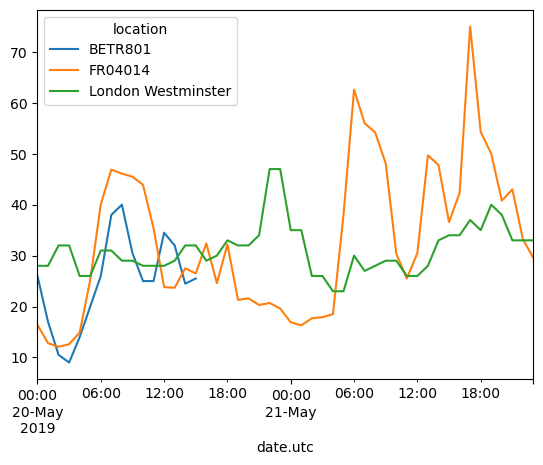

In [47]:
# Create a plot of the values in the different stations from the 20th of May till the end of 21st of May
# 以2019-05-20和2019-05-21之间的数据创建图表
no_2['2019-05-20' : '2019-05-21'].plot()

In [48]:
print(passInfo)

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch  PsychologicalAge  \
0            1         0       3    male   22      1      0              26.4   
1            2         1       1  female   38      1      0              45.6   
2            3         1       3  female   26      0      0              31.2   
3            4         1       1  female   35      1      0              42.0   
4            5         0       2    male   35      0      0              42.0   
5            6         0       3    male   18      0      0              21.6   
6            7         0       1    male   54      0      0              64.8   
7            8         0       3    male    2      3      1               2.4   
8            9         1       3  female   27      0      2              32.4   

   PclassRatioAge  
0        0.136364  
1        0.026316  
2        0.115385  
3        0.028571  
4        0.057143  
5        0.166667  
6        0.018519  
7        1.500000  
8        

In [49]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Name,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,"Braund, Mr. Owen Harris",0,3,male,22,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38,1,0
2,3,"Heikkinen, Miss Laina",1,3,female,26,0,0
3,4,"Allen, Mr. William Henry",1,1,female,35,1,0
4,5,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,male,35,0,0


In [50]:
print(titanic['Name'].str.lower())

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                                heikkinen, miss laina
3                             allen, mr. william henry
4                  nasser, mrs. nicholas (adele achem)
5                       saundercock, mr. william henry
6                  vestrom, miss hulda amanda adolfina
7                                  rice, master eugene
8    vander planke, mrs. julius (emelia maria vande...
Name: Name, dtype: object


In [51]:
# 创建一个列，获取Name的名(FirstName)
print(titanic['Name'].str.split(','))
print(titanic['Name'].str.split(',').str.get(0))

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                             [Heikkinen,  Miss Laina]
3                          [Allen,  Mr. William Henry]
4               [Nasser,  Mrs. Nicholas (Adele Achem)]
5                    [Saundercock,  Mr. William Henry]
6               [Vestrom,  Miss Hulda Amanda Adolfina]
7                               [Rice,  Master Eugene]
8    [Vander Planke,  Mrs. Julius (Emelia Maria Van...
Name: Name, dtype: object
0           Braund
1          Cumings
2        Heikkinen
3            Allen
4           Nasser
5      Saundercock
6          Vestrom
7             Rice
8    Vander Planke
Name: Name, dtype: object


In [52]:
# 名字中包含William的乘客
print(titanic['Name'].str.contains('William'))
print(titanic.loc[titanic['Name'].str.contains('William')])

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7    False
8    False
Name: Name, dtype: bool
   PassengerId                            Name  Survived  Pclass     Sex  Age  \
3            4        Allen, Mr. William Henry         1       1  female   35   
5            6  Saundercock, Mr. William Henry         0       3    male   18   

   SibSp  Parch  
3      1      0  
5      0      0  


In [53]:
# 获取最长姓名的乘客
print(titanic['Name'].str.len().idxmax())

8


In [54]:
# In the “Sex” column, replace values of “male” by “M” and values of “female” by “F”
titanic['Sex_short'] = titanic['Sex'].replace({'male': 'M', 'female': 'F'})
titanic.head()

,PassengerId,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Sex_short
0,1,"Braund, Mr. Owen Harris",0,3,male,22,1,0,M
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38,1,0,F
2,3,"Heikkinen, Miss Laina",1,3,female,26,0,0,F
3,4,"Allen, Mr. William Henry",1,1,female,35,1,0,F
4,5,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,male,35,0,0,M
